<a href="https://colab.research.google.com/github/haviet12/Date_4_AI/blob/main/con_lac_nguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a32a8a11550e715d1412481a39bbad23f5fb097696bb11e88025a7572f26cac1
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *

In [3]:
alpha=np.linspace(-pi/2,pi/2,61)
der=np.linspace(-pi/4,pi/4,61)
force=np.linspace(-150,150,61)
## tao cac bien dau vao
force =ctrl.Consequent( force,"force")
alpha =ctrl.Antecedent(alpha,"alpha")
der= ctrl.Antecedent(der,"der")



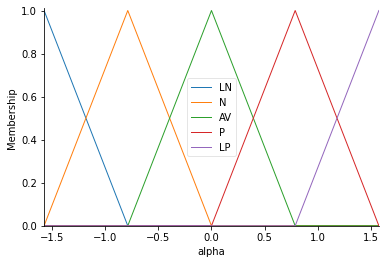

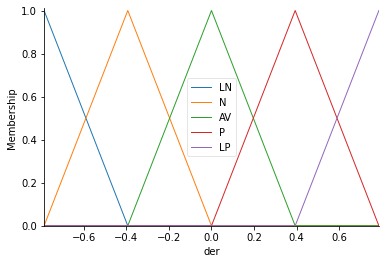

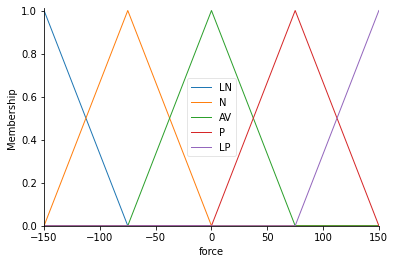

In [4]:
evaluate =['LN','N','AV','P','LP']
alpha.automf(names=evaluate)
der.automf(names=evaluate)
force.automf(names=evaluate)

alpha.view()

der.view()
force.view()

In [22]:
rule_1= ctrl.Rule(antecedent=(alpha['LN']&der['LN'])|
                              (alpha['LN']&der['N'])|
                              (alpha['LN']&der['AV'])|
                              (alpha['N']&der['LN'])|
                              (alpha['N']&der['N']),
                              consequent=force['LP'],label="Large Positive")
rule_2= ctrl.Rule(antecedent=(alpha['LP']&der['N'])|
                              (alpha['P']&der['AV'])|
                              (alpha['AV']&der['P'])|
                              (alpha['N']&der['LP']),
                              consequent=force['N'],label="Negative")
rule_3= ctrl.Rule(antecedent=(alpha['LP']&der['LN'])|
                              (alpha['P']&der['N'])|
                              (alpha['AV']&der['AV'])|
                              (alpha['N']&der['P'])|
                              (alpha['LN']&der['LP']),
                              consequent=force['AV'],label="Average")
rule_4= ctrl.Rule(antecedent=(alpha['P']&der['LN'])|
                              (alpha['AV']&der['N'])|
                              (alpha['N']&der['AV'])|
                              (alpha['LN']&der['P']),
                              consequent=force['P'],label="Positive")
rule_5= ctrl.Rule(antecedent=(alpha['LP']&der['AV'])|
                              (alpha['LP']&der['P'])|
                              (alpha['P']&der['P'])|
                              (alpha['LP']&der['LP'])|
                              (alpha['P']&der['LP'])|
                              (alpha['AV']&der['LP']),
                              consequent=force['LN'],label="Large Negative")


120.83333333333333


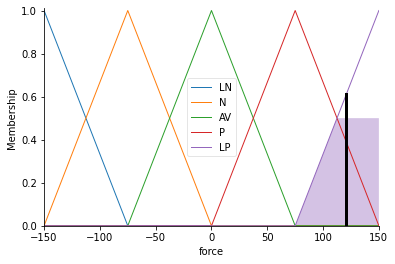

In [23]:
sys= ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5])

res=ctrl.ControlSystemSimulation(sys)
res.input['alpha']=-pi/8
res.input['der']=-pi/4

res.compute()
print(res.output['force'])
force.view(res)


In [43]:
sim=ctrl.ControlSystemSimulation(sys,flush_after_run=10*10+1)
upsample=np.linspace(0,1.5,10)
x,y=np.meshgrid(upsample,upsample)
z=np.zeros_like(x)

In [45]:
for i in range(10):
  for j in range(10):
    sim.input['alpha']=x[i,j]
    sim.input['der']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['force']

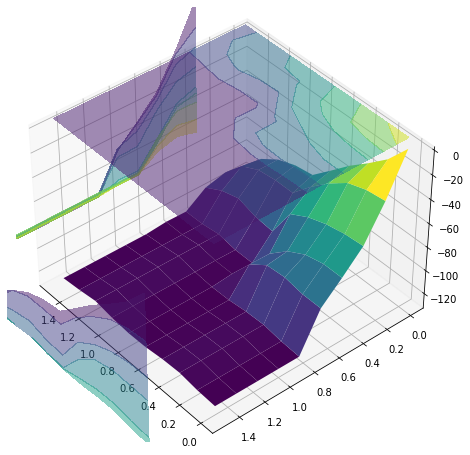

In [47]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis', linewidth=0.4,antialiased=True)
cset=ax.contourf(x,y,z,zdir='z', offset=9,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,z,zdir='y', offset=2,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,z,zdir='x', offset=2,cmap='viridis', alpha=0.5)
ax.view_init(40,500)